In [95]:
import os
import IPython.display as ipd
import librosa
import librosa.display
import sklearn
import sklearn.preprocessing
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
audio_path = "data/train/audio/1699168553.677.mp3"
data_dir = "data/train/audio"

In [4]:
ipd.Audio(audio_path)

In [22]:
df = pd.read_json("data/train/train.json", orient="index").reset_index()
df.columns = ["filename", "description"]
df

,filename,description
0,1699168556.1432111.mp3,The recording features a live performance of a...
1,1699168565.7955616.mp3,"The recording features a mellow piano melody, ..."
2,1699168589.6105175.mp3,The recording features an electro song that co...
3,1699168567.8103771.mp3,This music is an electronic instrumental. The ...
4,1699168575.4547818.mp3,The recording features an electro song that co...
...,...,...
9995,1699168570.7434902.mp3,The recording features a traditional song that...
9996,1699168578.7201939.mp3,The recording features an arpeggiated electric...
9997,1699168585.7472737.mp3,The recording features an arpeggiated acoustic...
9998,1699168586.015741.mp3,This instrumental song features a harp playing...


In [23]:
audio_array , sample_rate = librosa.load(audio_path)
audio_array

array([ 5.3632830e-06,  5.9544573e-06,  4.5013530e-06, ...,
       -5.8809784e-03, -5.5171195e-03, -2.0298215e-03], dtype=float32)

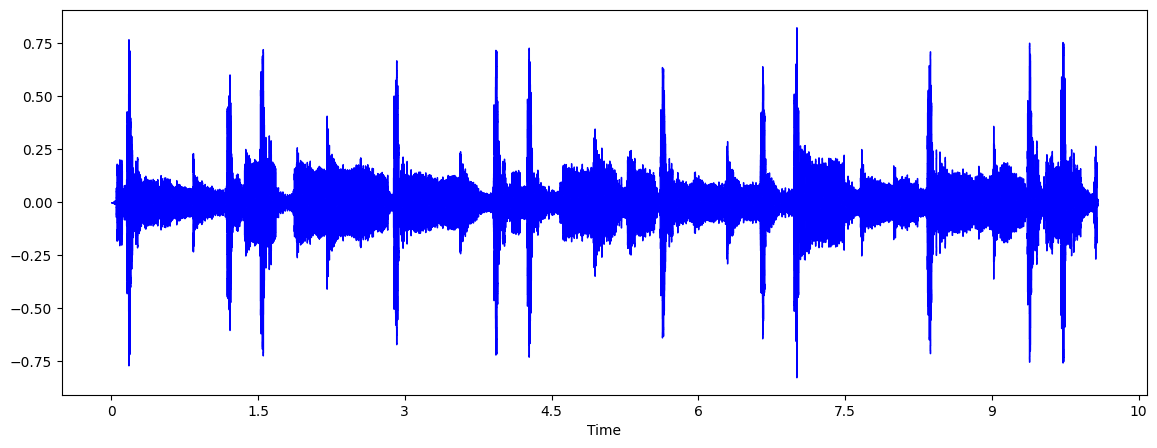

In [31]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio_array, sr=sample_rate, color="blue")

In [86]:
def plot_samples_wave(data_dir, df, n_samples=3):
    df_sample = df.sample(n_samples)
    for i, row in df_sample.iterrows():
        audio_array , sample_rate = librosa.load(os.path.join(data_dir, row['filename']))
        plt.figure(figsize=(15, 6))
        plt.title(row['filename'])
        plt.annotate(
            text="Description:\n" + row['description'].replace(".", "\n"),
            xy=(0, 0),
            xytext=(0, -0.3),
            xycoords='axes fraction',
            fontsize=12
        )
        librosa.display.waveshow(audio_array, sr=sample_rate, color="blue")

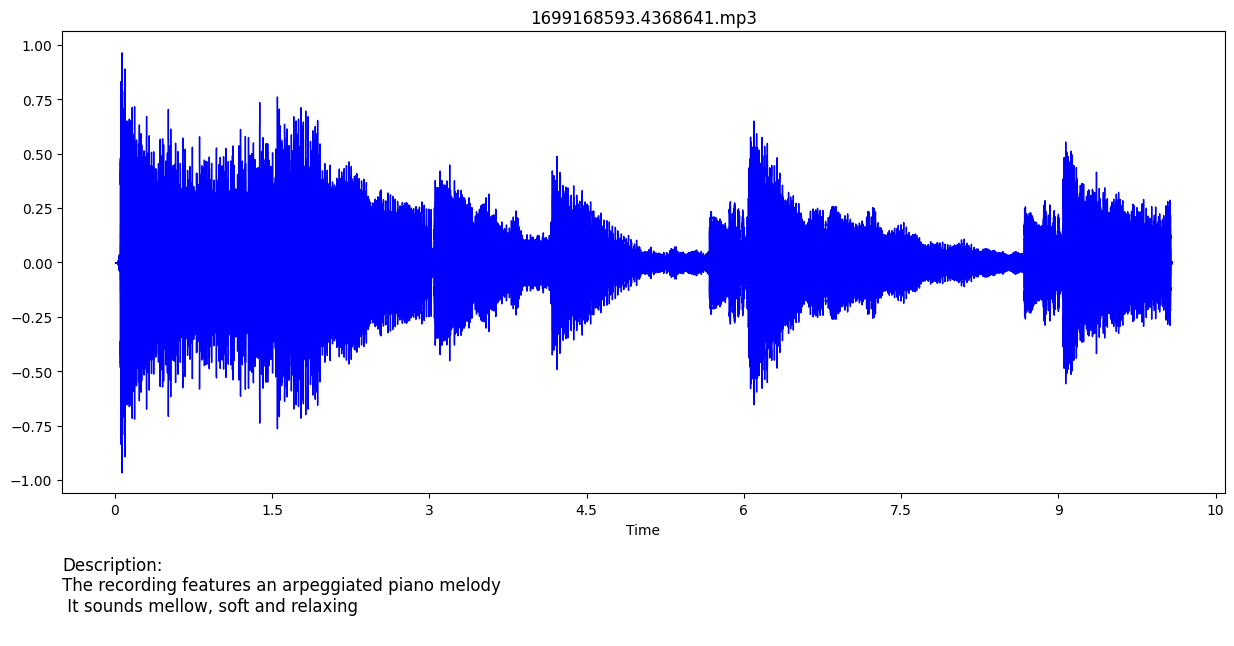

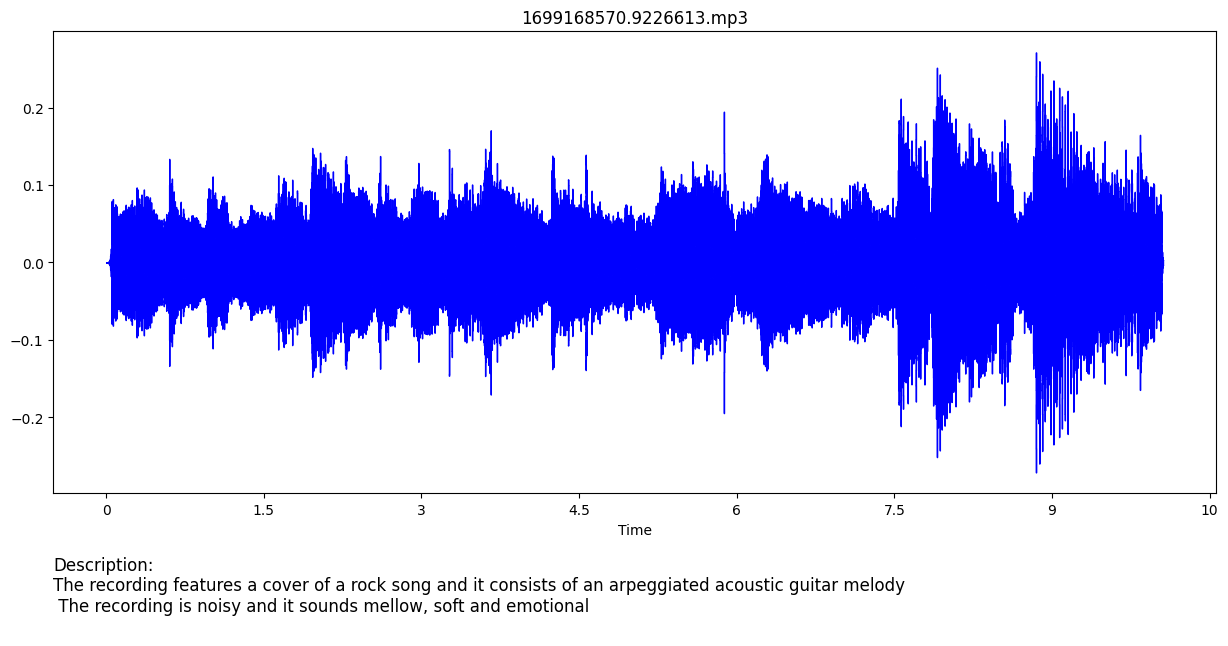

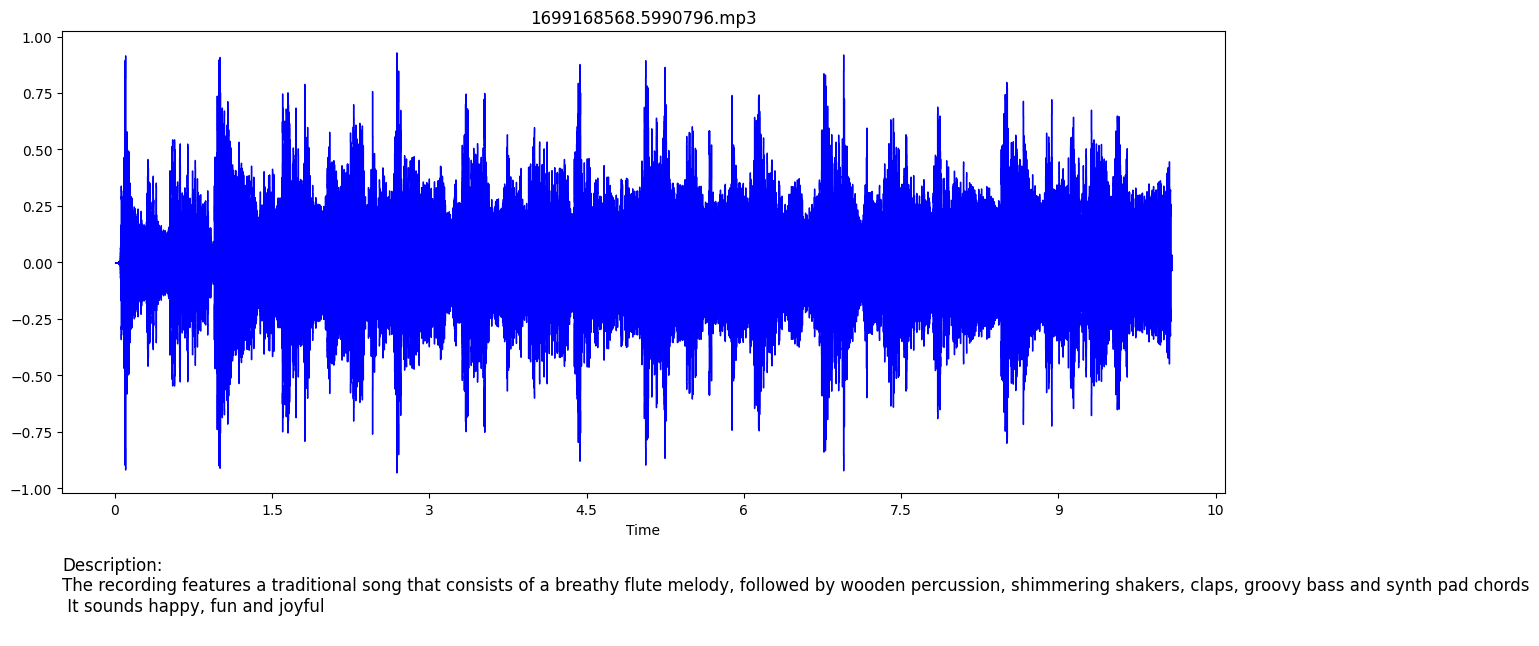

In [87]:
plot_samples_wave(data_dir, df)

In [90]:
def plot_samples_spectrum(data_dir, df, n_samples=3):
    df_sample = df.sample(n_samples)
    for i, row in df_sample.iterrows():
        audio_array , sample_rate = librosa.load(os.path.join(data_dir, row['filename']))
        X = librosa.stft(y=audio_array)
        Xdb = librosa.amplitude_to_db(abs(X))
        plt.figure(figsize=(15, 6))
        plt.title(row['filename'])
        plt.annotate(
            text="Description:\n" + row['description'].replace(".", "\n"),
            xy=(0, 0),
            xytext=(0, -0.3),
            xycoords='axes fraction',
            fontsize=12
        )
        librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='log')

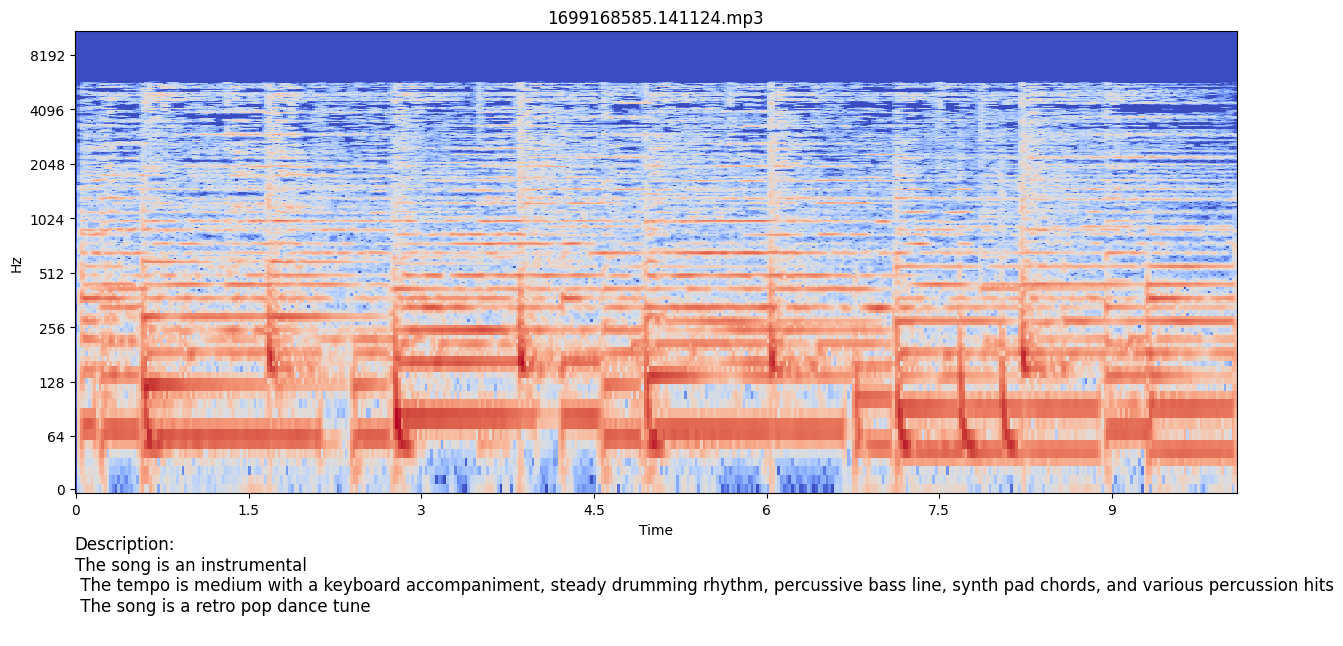

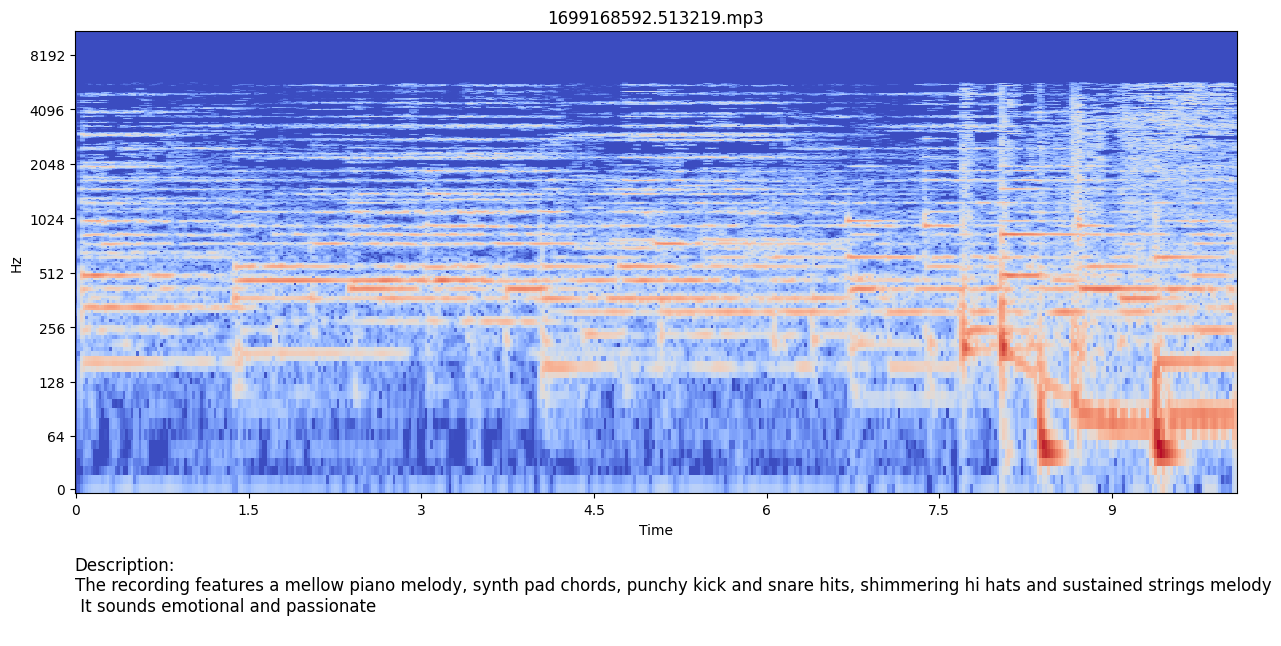

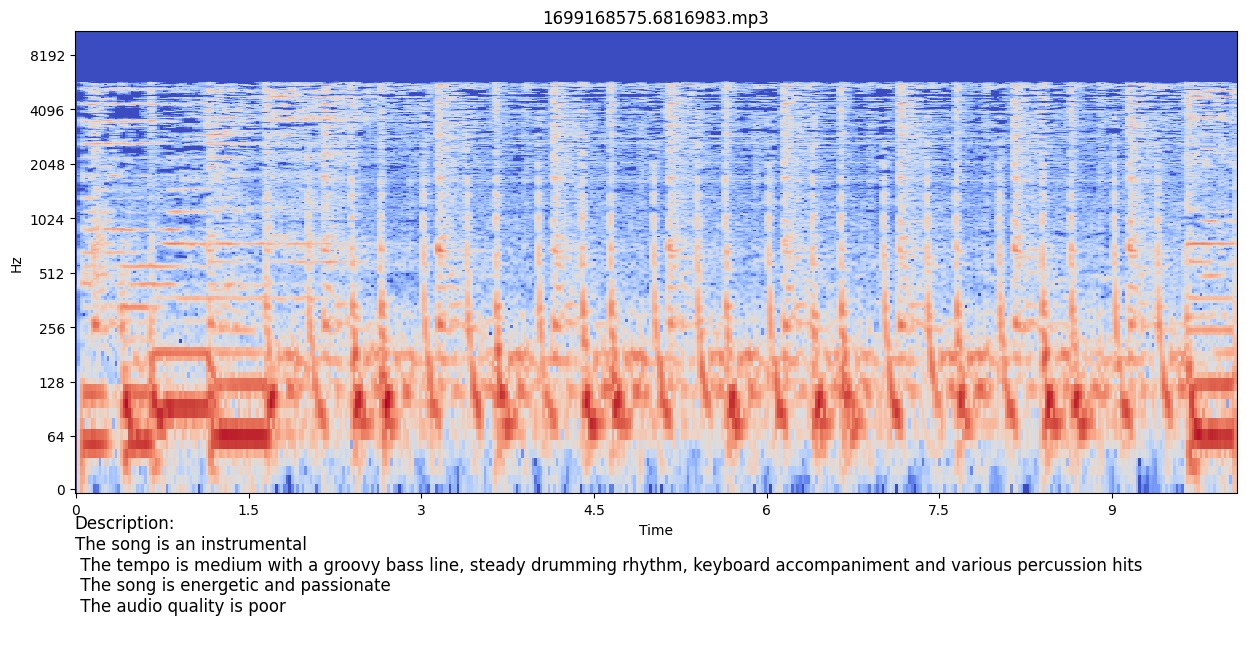

In [91]:
plot_samples_spectrum(data_dir, df)

In [98]:
def plot_samples_mfcc(data_dir, df, n_samples=3):
    df_sample = df.sample(n_samples)
    for i, row in df_sample.iterrows():
        audio_array , sample_rate = librosa.load(os.path.join(data_dir, row['filename']))
        mfccs = librosa.feature.mfcc(y=audio_array, sr=sample_rate)
        mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
        plt.figure(figsize=(15, 6))
        plt.title(row['filename'])
        plt.annotate(
            text="Description:\n" + row['description'].replace(".", "\n"),
            xy=(0, 0),
            xytext=(0, -0.3),
            xycoords='axes fraction',
            fontsize=12
        )
        librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time', y_axis='mel')

/Users/macos/miniconda3/envs/zaic2023/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/macos/miniconda3/envs/zaic2023/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/Users/macos/miniconda3/envs/zaic2023/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/macos/miniconda3/envs/zaic2023/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues 

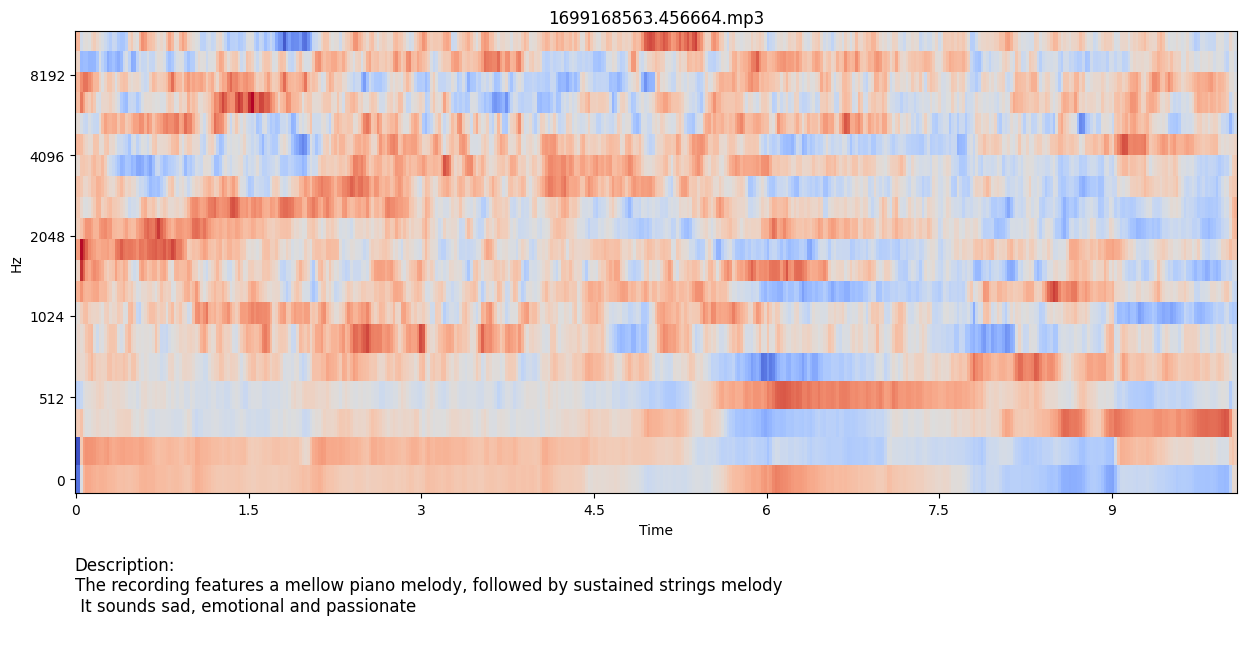

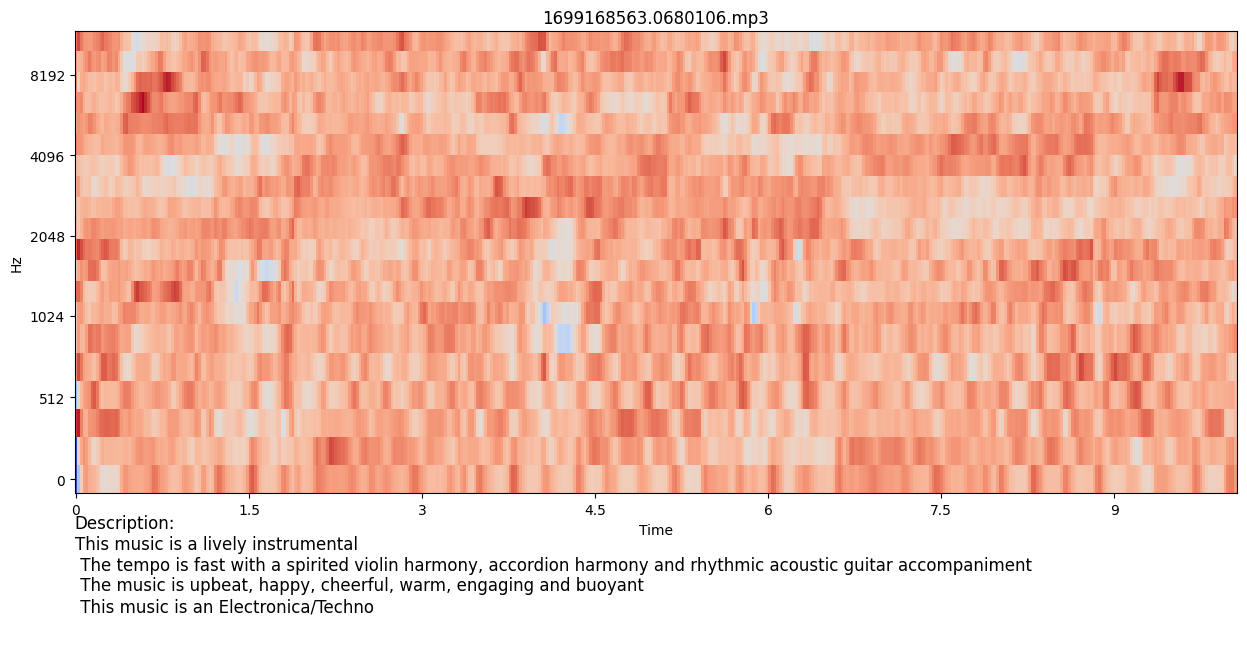

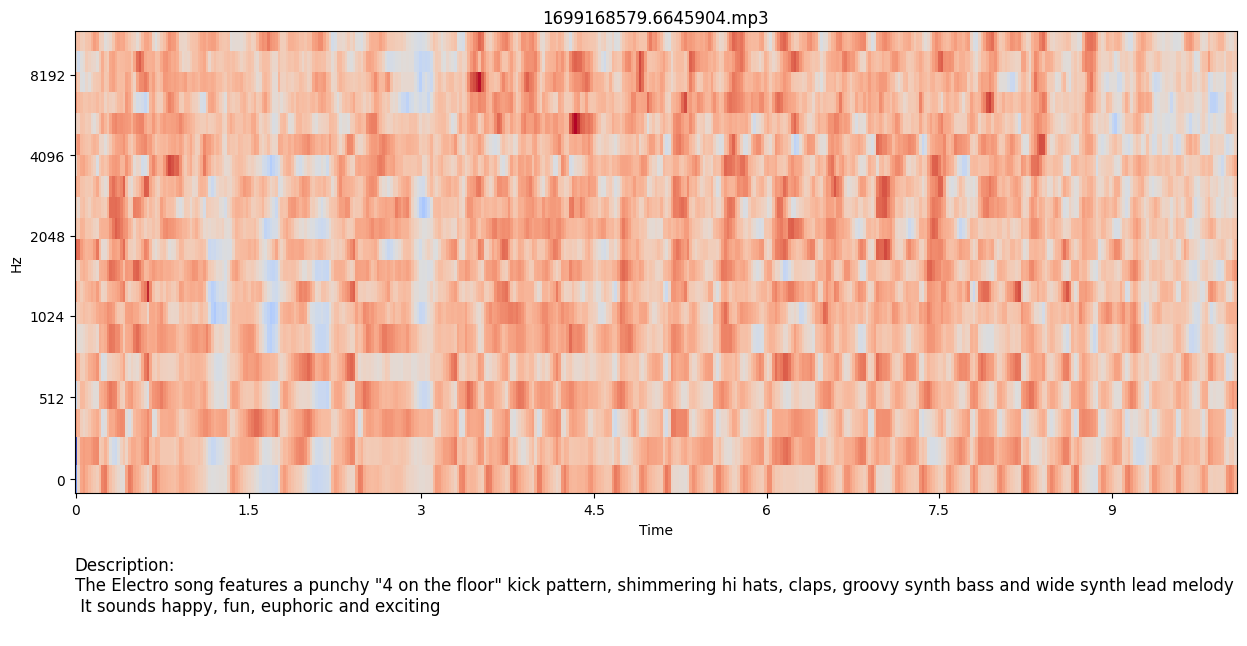

In [99]:
plot_samples_mfcc(data_dir, df)

In [122]:
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from collections import Counter

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /Users/macos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [144]:
def preprocess_sentence(sentence):
    stop_words = set(stopwords.words('english'))
    sentence = sentence.lower()
    sentence = sentence.replace(".", " ")
    sentence = sentence.replace(",", " ")
    sentence = sentence.replace("!", " ")
    sentence = sentence.replace("?", " ")
    sentence = sentence.replace("/", " ")
    sentence = sentence.replace("  ", " ")
    sentence = " ".join([word for word in sentence.split(" ") if word not in stop_words])
    return sentence

def get_word_count_with_ngram(sentence, n_gram=1):
    word_tokens = ngrams(sentence.split(), n_gram)
    word_gram = [" ".join(gram) for gram in word_tokens]
    return word_gram

In [179]:
def plot_n_gram_count(df, n_gram=1, top_n=30):
    word_list = []
    sentence_list = df["description"].tolist()
    sentence_list = [preprocess_sentence(sentence) for sentence in sentence_list]
    word_gram = [get_word_count_with_ngram(sentence, n_gram=n_gram) for sentence in sentence_list]
    for word in word_gram:
        word_list.extend(word)
    word_count = Counter(word_list)
    word_count = word_count.most_common(top_n)
    plt.figure(figsize=(15, 6))
    plt.barh([val[0] for val in word_count], [val[1] for val in word_count], align='center')
    plt.title("Top {} of {}-gram count".format(top_n, n_gram))
    plt.xlabel("count")
    plt.ylabel("word")
    plt.show()

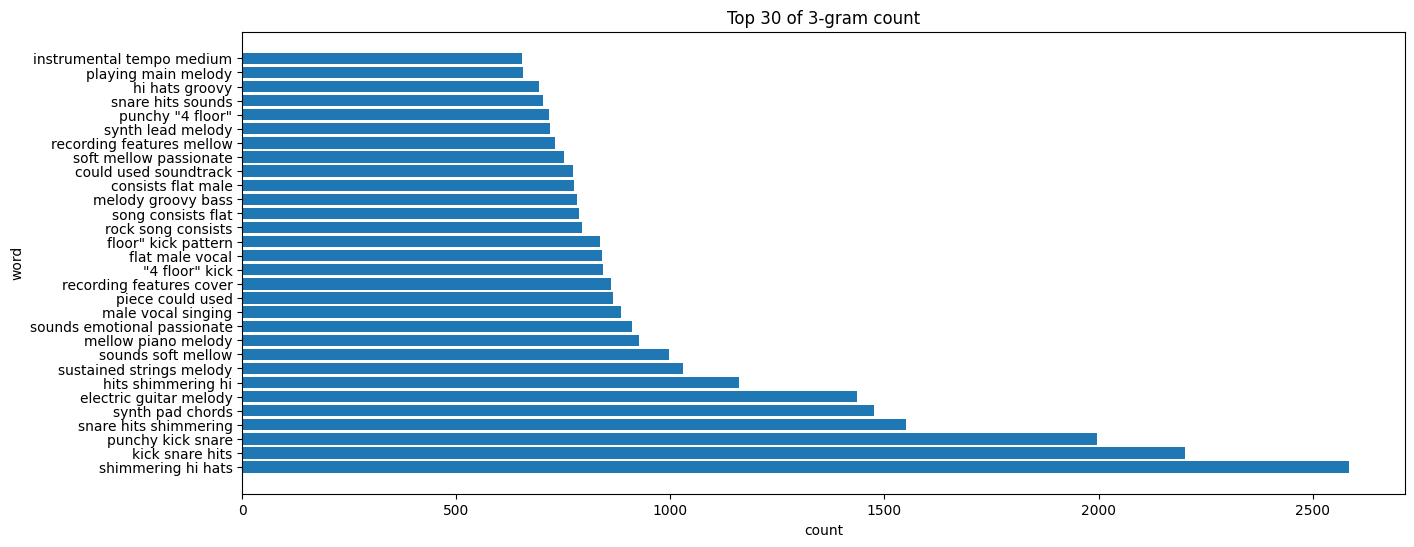

In [180]:
plot_n_gram_count(df, n_gram=3)

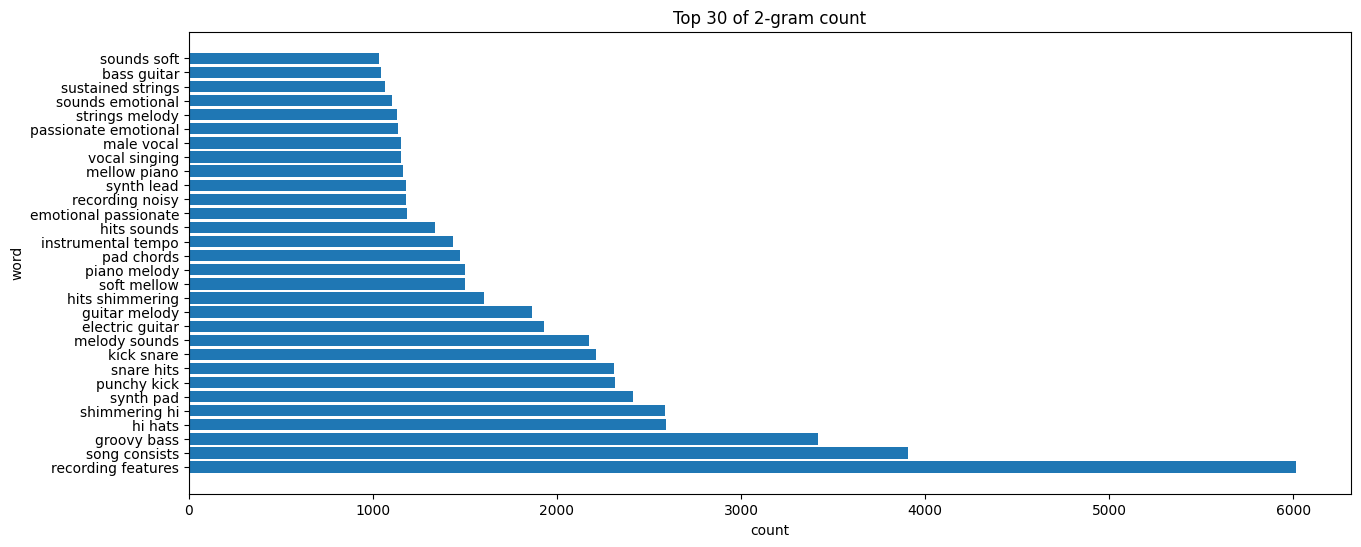

In [181]:
plot_n_gram_count(df, n_gram=2)

In [182]:
df_test = pd.read_json("data/test/public.json", orient="index").reset_index()
df_test.columns = ["filename", "description"]
df_test

,filename,description
0,1699168496.395952.mp3,The recording features a widely spread electri...
1,1699168495.217152.mp3,The recording features a cover of a rock song ...
2,1699168495.1176987.mp3,The recording features an arpeggiated acoustic...
3,1699168498.4178677.mp3,The recording features a cover of a rock song ...
4,1699168495.6089337.mp3,The recording features an arpeggiated acoustic...
...,...,...
995,1699168495.8377826.mp3,The recording features an electric guitar melo...
996,1699168497.4438887.mp3,The song is an instrumental. The song is mediu...
997,1699168498.8182535.mp3,The recording features a hip hop song that con...
998,1699168497.9366477.mp3,The recording features a children's song that ...


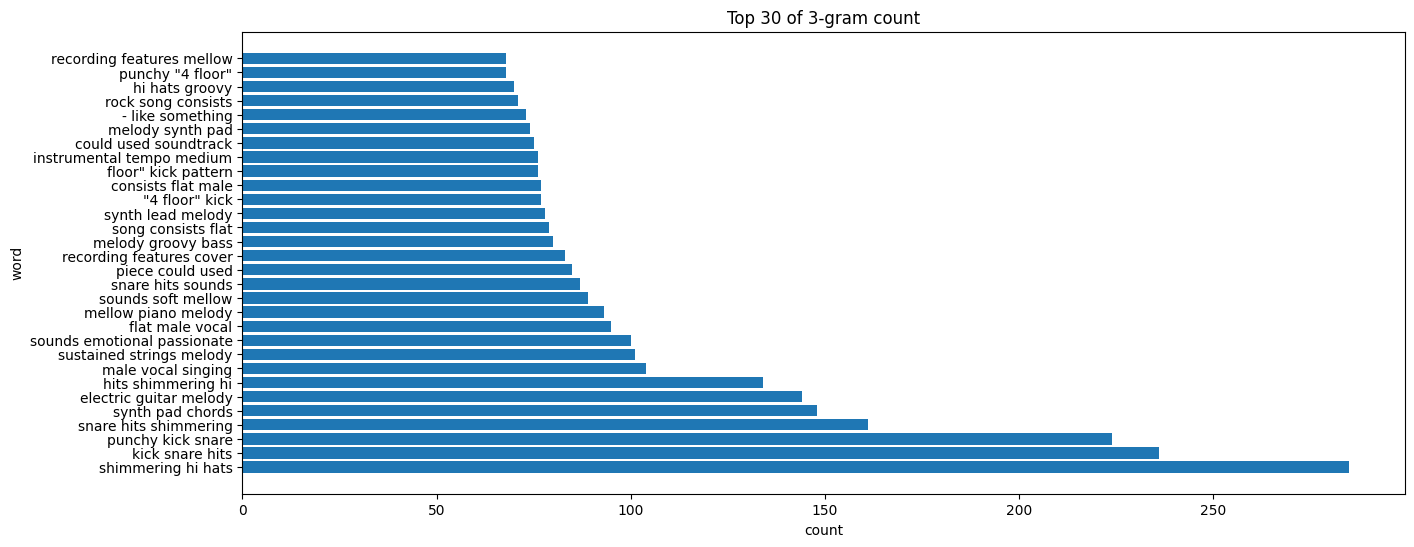

In [183]:
plot_n_gram_count(df_test, n_gram=3)

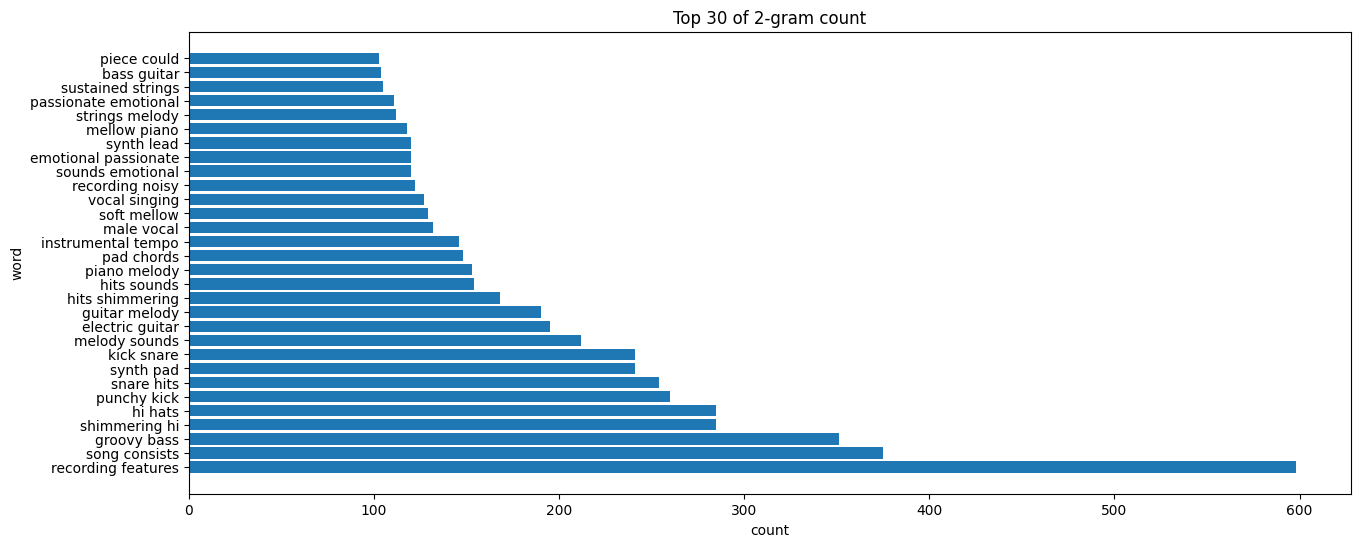

In [184]:
plot_n_gram_count(df_test, n_gram=2)